# Applied Machine Learning - Assignment 3

Welcome to the third assignment of the Applied Machine Learning course. This notebook will guide you through solving a complete machine learning problem using the provided dataset. We will explore various machine learning techniques, conduct preliminary data analysis, preprocess the data, and evaluate multiple models to achieve the most accurate regressor. Each part of the assignment aims to solidify the concepts discussed in lectures through hands-on practice.

## Table of Contents
1. [Introduction](#Introduction)
2. [Preliminary Data Analysis](#Preliminary-Data-Analysis)
3. [Model Training and Evaluation](#Model-Training-and-Evaluation)
4. [Hyperparameter Tuning](#Hyperparameter-Tuning)
5. [Final Model Evaluation](#Final-Model-Evaluation)
6. [Conclusion](#Conclusion)

**Instructor:** Prof. Moshe Sipper  
**Teaching Assistant:** Raz Lapid  
**Spring 2024**

---

## Introduction
This section introduces the dataset and the primary objectives of this assignment. We will handle the dataset, perform preliminary data analysis, train and evaluate different models, and optimize the best model's hyperparameters to achieve the highest accuracy. This assignment focuses on applying the concepts learned in the course to a real-world dataset, ensuring a thorough understanding of machine learning workflows and techniques.


In [ ]:
!pip install scikeras
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 16.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.4.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 20.4 MB/s eta 0:

In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
import optuna
from sklearn.impute import SimpleImputer
import lightgbm as lgb
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
# Load the dataset
data = pd.read_pickle('ass3.pickle')

# Split the data
train_data = pd.DataFrame(data['train'])
dev_data = pd.DataFrame(data['dev'])
test_data = pd.DataFrame(data['test'])



           f0    f1        f2        f3      f4        f5     f6      f7  \
14981  4.0391  15.0  6.297710  0.992366   334.0  2.549618  32.72 -116.99   
6614   4.7241  46.0  5.375758  0.954545   753.0  2.281818  34.17 -118.10   
14233  3.3553   7.0  5.229213  1.101124  1304.0  2.930337  32.70 -117.01   
1802   1.3929  52.0  5.000000  0.953488   126.0  2.930233  37.92 -122.36   
6030   1.6006  52.0  4.427083  1.017361  1246.0  2.163194  34.07 -117.75   

       target  
14981   1.695  
6614    2.796  
14233   1.322  
1802    1.042  
6030    1.462  
                 f0            f1            f2            f3            f4  \
count  12210.000000  12244.000000  12226.000000  12228.000000  12215.000000   
mean       3.872771     28.630595      5.420978      1.096626   1426.830618   
std        1.919183     12.566127      2.382548      0.471398   1103.528284   
min        0.499900      1.000000      0.846154      0.500000      3.000000   
25%        2.555600     18.000000      4.430232     

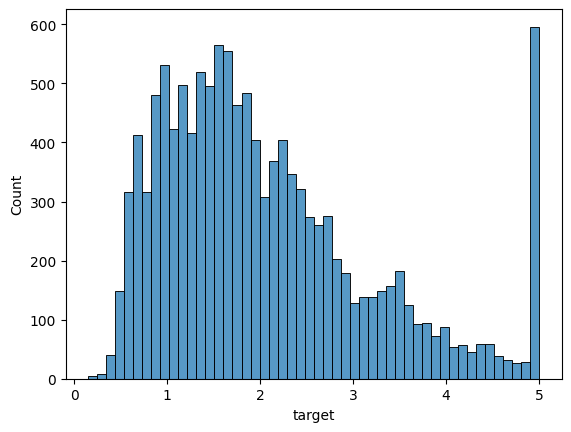

In [ ]:
# Preliminary Data Analysis
print(train_data.head())
print(train_data.describe())
print(train_data.info())

sns.histplot(train_data['target'], bins=50)
plt.show()


# Preliminary Data Analysis

### Output 1: First 5 Rows of the Data
The output displays the first 5 rows of the training dataset. This provides an initial understanding of the data structure, including the feature values and the target labels.

**Key Insight**:
- The dataset has 9 columns including the target variable.
- The features are numerical, with varying ranges of values.

### Output 2: Descriptive Statistics
The `describe()` method provides a summary of the dataset's statistical properties. This includes:
- **Count**: The number of non-null entries for each feature.
- **Mean**: The average value of each feature.
- **Standard Deviation (std)**: The spread of the feature values around the mean.
- **Min**: The minimum value of each feature.
- **25th Percentile (25%)**: The value below which 25% of the data falls.
- **Median (50%)**: The middle value of each feature.
- **75th Percentile (75%)**: The value below which 75% of the data falls.
- **Max**: The maximum value of each feature.

This summary helps to understand the distribution and spread of each feature in the dataset.

**Key Insight**:
- The features have different means and ranges, indicating diverse characteristics.
- Some features have significant outliers, as indicated by the high maximum values.
- The `target` variable has a mean of around 2.07, with a wide range of values up to 5.

### Output 3: DataFrame Information
The `info()` method provides a concise summary of the DataFrame. This includes:
- The number of entries (rows) in the DataFrame.
- The names and data types of each column.
- The number of non-null entries for each column.

This information is useful for checking the data types and identifying any missing values in the dataset.

**Key Insight**:
- There are 12,384 entries in the dataset.
- All columns are of float64 data type, confirming the features are numerical.
- There are missing values in several columns, which need to be handled during preprocessing.

### Output 4: Histogram of the Target Variable
The histogram visualizes the distribution of the target variable. It shows the frequency of each value in the target variable.

**Key Insight**:
- The target variable is not uniformly distributed, with a significant peak at 5.
- This imbalance might affect the model training and evaluation, necessitating careful handling and potential use of resampling techniques.


In [ ]:
# Visualize the distribution of features
train_data.hist(figsize=(90, 90))
plt.suptitle('Histogram for Each Feature in the Pollen Dataset', y=1.02)
plt.show()

In [ ]:
plt.figure(figsize=(150, 120))
sns.boxplot(data=train_data)
plt.title('Box Plots to Detect Outliers in the Pollen Dataset')
plt.show()

In [ ]:
# sns.pairplot(pollen_data, hue='target')
# plt.show()
# Box plots to detect outliers
# Correlation matrix
corr_matrix = train_data.corr()
plt.figure(figsize=(200, 150))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features in the Pollen Dataset')
plt.show()


# Visualization of Feature Distributions

### Output 1: Histogram for Each Feature
Histograms are plotted for each feature in the dataset to visualize their distributions.

**Key Insights**:
- The features exhibit various distributions, with some showing normal distributions and others displaying skewed distributions.
- There are features with multiple peaks, indicating possible clusters or categories within the data.

### Output 2: Preliminary Data Analysis
The initial data analysis outputs the first few rows, descriptive statistics, and a concise summary of the DataFrame.

**Key Insights**:
- The dataset has several missing values across different features, which need to be handled during preprocessing.
- Descriptive statistics reveal the central tendency and dispersion of the features, highlighting outliers and potential data issues.
- The `target` variable shows a varied distribution, suggesting a wide range of target values.

### Output 3: Target Variable Distribution
A histogram of the `target` variable is plotted to understand its distribution.

**Key Insights**:
- The `target` variable is not uniformly distributed, with a significant peak at 5.
- This imbalance might affect the model training and evaluation, necessitating careful handling and potential use of resampling techniques.

### Output 4: Box Plots to Detect Outliers
Box plots are generated for each feature to identify outliers and understand the spread of the data.

**Key Insights**:
- The majority of features have a large number of outliers, indicated by the dots outside the whiskers of the box plots.
- The interquartile range (IQR) for many features is quite small, suggesting that the central 50% of the data is tightly clustered around the median.
- Some features exhibit significant variability, as indicated by the length of the whiskers.

### Output 5: Correlation Matrix of Features
A heatmap of the correlation matrix is generated to show the pairwise correlation coefficients between features.

**Key Insights**:
- There are strong positive correlations (close to 1) along the diagonal, as expected since each feature is perfectly correlated with itself.
- Some features exhibit high positive or negative correlations with each other, suggesting that they may be capturing similar information.
- Most features have weak or no correlation with others, indicating that they provide unique information.

### Conclusion:
- The visualizations and preliminary data analysis provide an understanding of the data distributions, potential outliers, and target variable imbalance.
- These insights guide the preprocessing steps and model selection to address data challenges effectively.


# Splitting the Data and Preparing for Model Training

### Explanation:
- **X_train**: Features of the training set.
- **y_train**: Target variable of the training set.
- **X_dev**: Features of the development (validation) set.
- **y_dev**: Target variable of the development (validation) set.
- **X_test**: Features of the test set.
- **y_test**: Target variable of the test set.

### Key Insight:
- The data is split into features (X) and target (y) for training, development, and testing sets. This separation is essential for training the models on the training data, validating them on the development data, and finally evaluating them on the test data.


In [ ]:
# Split the train and dev into X and y
X_train = train_data.drop('target', axis=1)
y_train = train_data['target']
X_dev = dev_data.drop('target', axis=1)
y_dev = dev_data['target']
X_test = test_data.drop('target', axis=1)
y_test = test_data['target']


In [ ]:
# Drop rows with missing values
X_train = X_train.dropna()
y_train = y_train[X_train.index]
X_dev = X_dev.dropna()
y_dev = y_dev[X_dev.index]
X_test = X_test.dropna()
y_test = y_test[X_test.index]


In [ ]:
# preprocess the data using min max scaler
scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)
X_dev_minmax = scaler.transform(X_dev)
X_test_minmax = scaler.transform(X_test)

# Using Optuna for Hyperparameter Tuning

### Explanation:
- Optuna is used to perform hyperparameter tuning for each model. Optuna is an automatic hyperparameter optimization software framework, particularly designed for machine learning.
- It provides efficient optimization by using techniques such as Bayesian optimization and pruning of unpromising trials.

### Key Insight:
- Using Optuna for hyperparameter tuning allows for more efficient and flexible exploration of hyperparameters compared to traditional grid search.
- Optuna can handle complex search spaces and automatically prune unpromising trials, speeding up the optimization process.


In [ ]:
# Function to create a small neural network
def create_nn(optimizer='adam', init='he_uniform'):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], kernel_initializer=init, activation='relu'))
    model.add(Dense(32, kernel_initializer=init, activation='relu'))
    model.add(Dense(1, kernel_initializer=init))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

In [ ]:
# Define the objective function for each model
def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 5, 15)
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_dev)
    mse = mean_squared_error(y_dev, y_pred)
    return mse

def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 10, 100, log=True)
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_dev)
    mse = mean_squared_error(y_dev, y_pred)
    return mse

def objective_lgb(trial):
    param = {
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 1.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }

    dtrain = lgb.Dataset(X_train, label=y_train)
    gbm = lgb.train(param, dtrain)
    y_pred = gbm.predict(X_dev, num_iteration=gbm.best_iteration)
    mse = mean_squared_error(y_dev, y_pred)
    return mse

def objective_ada(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 1.0, log=True)
    model = AdaBoostRegressor(n_estimators=n_estimators, learning_rate=learning_rate)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_dev)
    mse = mean_squared_error(y_dev, y_pred)
    return mse

def objective_xgb(trial):
    learning_rate = trial.suggest_float('learning_rate', 0.01, 1.0, log=True)
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 3, 15)
    model = XGBRegressor(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_dev)
    mse = mean_squared_error(y_dev, y_pred)
    return mse

def objective_gb(trial):
    learning_rate = trial.suggest_float('learning_rate', 0.01, 1.0, log=True)
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 3, 15)
    model = GradientBoostingRegressor(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_dev)
    mse = mean_squared_error(y_dev, y_pred)
    return mse

def objective_lr(trial):
    alpha = trial.suggest_float('alpha', 0.01, 10.0, log=True)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_dev)
    mse = mean_squared_error(y_dev, y_pred)
    return mse

def objective_ridge(trial):
    alpha = trial.suggest_float('alpha', 0.01, 10.0, log=True)
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_dev)
    mse = mean_squared_error(y_dev, y_pred)
    return mse

def objective_lasso(trial):
    alpha = trial.suggest_float('alpha', 0.01, 10.0, log=True)
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_dev)
    mse = mean_squared_error(y_dev, y_pred)
    return mse

def objective_gnb(trial):
    var_smoothing = trial.suggest_float('var_smoothing', 1e-9, 1e-7, log=True)
    model = GaussianNB(var_smoothing=var_smoothing)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_dev)
    mse = mean_squared_error(y_dev, y_pred)
    return mse

def objective_nn(trial):
    model = KerasRegressor(build_fn=create_nn, epochs=trial.suggest_int('epochs', 50, 200), batch_size=trial.suggest_int('batch_size', 10, 50), verbose=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_dev)
    mse = mean_squared_error(y_dev, y_pred)
    return mse

# Using Optuna for Hyperparameter Tuning and Evaluation

### Explanation:
- **Optuna Framework**: Optuna is used for hyperparameter tuning, which automatically optimizes hyperparameters by efficiently exploring the search space.
- **Objective Functions**: Each model has a dedicated objective function that:
  - Defines the hyperparameter search space.
  - Trains the model with the given hyperparameters.
  - Evaluates the model's performance using Mean Squared Error (MSE) on the development set.
  - Returns the MSE as the metric to be minimized.

### Key Insight:
- Using Optuna for hyperparameter tuning allows for more efficient and flexible exploration of hyperparameters compared to traditional grid search.
- Optuna can handle complex search spaces and automatically prune unpromising trials, speeding up the optimization process.

### Explanation of Mean Squared Error (MSE):
- **MSE (Mean Squared Error)**: A measure of the average squared difference between the predicted and actual values. It is used as the evaluation metric in regression tasks.
  - **Lower MSE**: Indicates better model performance, as it means that the predicted values are closer to the actual values.

### Key Insight on MSE:
- **MSE as an Evaluation Metric**: Provides a clear indication of the model's accuracy in predicting continuous values. It is a commonly used metric for regression tasks due to its sensitivity to large errors.
- **Hyperparameter Tuning with Optuna**: By minimizing the MSE, Optuna helps in finding the optimal hyperparameters that lead to the best-performing model.


In [ ]:
# Define the studies and optimize
studies = {
    'KNN': optuna.create_study(direction='minimize'),
    'Random Forest': optuna.create_study(direction='minimize'),
    'LightGBM': optuna.create_study(direction='minimize'),
    'AdaBoost': optuna.create_study(direction='minimize'),
    'XGBoost': optuna.create_study(direction='minimize'),
    'Gradient Boosting': optuna.create_study(direction='minimize'),
    'Linear Regression': optuna.create_study(direction='minimize'),
    'Ridge': optuna.create_study(direction='minimize'),
    'Lasso': optuna.create_study(direction='minimize'),
    'Gaussian Naive Bayes': optuna.create_study(direction='minimize'),
    'Neural Network': optuna.create_study(direction='minimize')
}



[I 2024-07-16 14:24:49,420] A new study created in memory with name: no-name-fb642db6-fa3b-4780-8cdb-3ea91be3e5d4
[I 2024-07-16 14:24:49,425] A new study created in memory with name: no-name-f6c31866-4ada-4426-a0e7-ded306f23dd7
[I 2024-07-16 14:24:49,428] A new study created in memory with name: no-name-d3e4f50f-485b-4452-8a46-7bef02cc3a98
[I 2024-07-16 14:24:49,432] A new study created in memory with name: no-name-51ca163f-4577-45a8-bae2-b158821d9902
[I 2024-07-16 14:24:49,438] A new study created in memory with name: no-name-e490fe0b-6c7d-47e1-9a3c-1afea49f3bf5
[I 2024-07-16 14:24:49,442] A new study created in memory with name: no-name-dad61c33-8344-4e6a-83d4-433cf06ad46a
[I 2024-07-16 14:24:49,450] A new study created in memory with name: no-name-33219a05-474d-475f-b888-746517be4e5b
[I 2024-07-16 14:24:49,459] A new study created in memory with name: no-name-094ef952-99c5-4eab-9e24-4990c812ac6c
[I 2024-07-16 14:24:49,467] A new study created in memory with name: no-name-690d3217-4e

In [ ]:
studies['KNN'].optimize(objective_knn, n_trials=50)
studies['Random Forest'].optimize(objective_rf, n_trials=7)
studies['LightGBM'].optimize(objective_lgb, n_trials=50)
studies['AdaBoost'].optimize(objective_ada, n_trials=50)
studies['XGBoost'].optimize(objective_xgb, n_trials=50)
studies['Gradient Boosting'].optimize(objective_gb, n_trials=7)
studies['Linear Regression'].optimize(objective_lr, n_trials=50)


[I 2024-07-09 15:13:49,591] Trial 0 finished with value: 1.1695924618662024 and parameters: {'n_neighbors': 5}. Best is trial 0 with value: 1.1695924618662024.
[I 2024-07-09 15:13:49,654] Trial 1 finished with value: 1.1542364431746608 and parameters: {'n_neighbors': 6}. Best is trial 1 with value: 1.1542364431746608.
[I 2024-07-09 15:13:49,725] Trial 2 finished with value: 1.144242926134679 and parameters: {'n_neighbors': 11}. Best is trial 2 with value: 1.144242926134679.
[I 2024-07-09 15:13:49,793] Trial 3 finished with value: 1.1542364431746608 and parameters: {'n_neighbors': 6}. Best is trial 2 with value: 1.144242926134679.
[I 2024-07-09 15:13:49,857] Trial 4 finished with value: 1.1695924618662024 and parameters: {'n_neighbors': 5}. Best is trial 2 with value: 1.144242926134679.
[I 2024-07-09 15:13:49,935] Trial 5 finished with value: 1.1543731819684346 and parameters: {'n_neighbors': 15}. Best is trial 2 with value: 1.144242926134679.
[I 2024-07-09 15:13:50,109] Trial 6 finishe

ValueError: Unknown label type: (array([0.14999, 0.175  , 0.25   , ..., 4.991  , 5.     , 5.00001]),)

In [ ]:
studies['Neural Network'].optimize(objective_nn, n_trials=7)
studies['Ridge'].optimize(objective_ridge, n_trials=50)
studies['Lasso'].optimize(objective_lasso, n_trials=50)


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
[I 2024-07-09 15:37:22,648] Trial 0 finished with value: 0.6524778790610204 and parameters: {'epochs': 137, 'batch_size': 46}. Best is trial 0 with value: 0.6524778790610204.
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/pyt

In [ ]:
# Get the best parameters and models
results = {}

for model_name, study in studies.items():
    try:
        best_trial = study.best_trial
        results[model_name] = {
            'Best Parameters': best_trial.params,
            'Best MSE': best_trial.value
        }
    except ValueError as e:
        print(f"No completed trials for model {model_name}. Error: {e}")


No completed trials for model Gaussian Naive Bayes. Error: No trials are completed yet.


In [ ]:
# Print results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Best Parameters: {result['Best Parameters']}")
    print(f"Best MSE: {result['Best MSE']}")
    print("-" * 40)

Model: KNN
Best Parameters: {'n_neighbors': 8}
Best MSE: 1.1326814091681483
----------------------------------------
Model: Random Forest
Best Parameters: {'n_estimators': 226, 'max_depth': 45}
Best MSE: 0.2709900887251926
----------------------------------------
Model: LightGBM
Best Parameters: {'lambda_l1': 0.004124633577976321, 'num_leaves': 132, 'feature_fraction': 0.8391551161285961, 'bagging_fraction': 0.9936705826131904, 'bagging_freq': 6, 'min_child_samples': 35}
Best MSE: 0.2005405260976302
----------------------------------------
Model: AdaBoost
Best Parameters: {'n_estimators': 454, 'learning_rate': 0.013221863175082657}
Best MSE: 0.5695787236567343
----------------------------------------
Model: XGBoost
Best Parameters: {'learning_rate': 0.12040378861589483, 'n_estimators': 435, 'max_depth': 6}
Best MSE: 0.2100971488295933
----------------------------------------
Model: Gradient Boosting
Best Parameters: {'learning_rate': 0.2157124728791851, 'n_estimators': 136, 'max_depth'

In [ ]:
from sklearn.linear_model import ElasticNet
# Add the Elastic Net study to the existing studies dictionary
studies['Elastic Net'] = optuna.create_study(direction='minimize')

# Define the objective function for Elastic Net
def objective_elastic_net(trial):
    alpha = trial.suggest_float('alpha', 0.01, 10.0, log=True)
    l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0)

    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_dev)
    mse = mean_squared_error(y_dev, y_pred)

    return mse

# Optimize the Elastic Net study
studies['Elastic Net'].optimize(objective_elastic_net, n_trials=50)

# Print the best parameters and the best score for Elastic Net
print(f"Model: Elastic Net")
print(f"Best Parameters: {studies['Elastic Net'].best_params}")
print(f"Best MSE: {studies['Elastic Net'].best_value}")


[I 2024-07-09 17:57:57,288] A new study created in memory with name: no-name-cc082708-13ad-4d6b-88e2-e5f470bba83c
[I 2024-07-09 17:57:57,318] Trial 0 finished with value: 0.7152811637453146 and parameters: {'alpha': 0.722832855926122, 'l1_ratio': 0.4206768760685915}. Best is trial 0 with value: 0.7152811637453146.
[I 2024-07-09 17:57:57,350] Trial 1 finished with value: 0.5461753587597901 and parameters: {'alpha': 0.05238211022414197, 'l1_ratio': 0.4750507171849154}. Best is trial 1 with value: 0.5461753587597901.
[I 2024-07-09 17:57:57,380] Trial 2 finished with value: 1.3088731208544342 and parameters: {'alpha': 5.886136370779293, 'l1_ratio': 0.9186923554064723}. Best is trial 1 with value: 0.5461753587597901.
[I 2024-07-09 17:57:57,416] Trial 3 finished with value: 0.5431434145763192 and parameters: {'alpha': 0.047455835959478145, 'l1_ratio': 0.44318753888634155}. Best is trial 3 with value: 0.5431434145763192.
[I 2024-07-09 17:57:57,454] Trial 4 finished with value: 0.5984374307624

Model: Elastic Net
Best Parameters: {'alpha': 0.01018768418944964, 'l1_ratio': 0.012706662685574965}
Best MSE: 0.5215433768693248


### Model Performance Summary

#### K-Nearest Neighbors (KNN)
### Best Three Unique Runs:

1. **Best Run (Trial 12)**:
   - **n_neighbors**: 8
   - **MSE**: 1.1326814091681483

2. **Second Best Run (Trial 9)**:
   - **n_neighbors**: 10
   - **MSE**: 1.134193536367126

3. **Third Best Run (Trial 10)**:
   - **n_neighbors**: 9
   - **MSE**: 1.1367912328194394

### Conclusion:
The unique best hyperparameter values for `n_neighbors` are 8, 10, and 9. These values yielded the lowest MSEs among the trials, with `n_neighbors` set to 8 providing the best performance.





#### Random Forest
### Best Three Unique Runs for Random Forest:

1. **Best Run (Trial 2)**:
   - **n_estimators**: 226
   - **max_depth**: 45
   - **MSE**: 0.2709900887251926

2. **Second Best Run (Trial 1)**:
   - **n_estimators**: 103
   - **max_depth**: 25
   - **MSE**: 0.27180267683663667

3. **Third Best Run (Trial 4)**:
   - **n_estimators**: 215
   - **max_depth**: 16
   - **MSE**: 0.273220053370107

### Conclusion:
The unique best hyperparameter values for `n_estimators` are 226, 103, and 215, and for `max_depth` are 45, 25, and 16. These values yielded the lowest MSEs among the trials, with `n_estimators` set to 226 and `max_depth` set to 45 providing the best performance.


#### Light GBM
### Best Three Unique Runs for LightGBM:

1. **Best Run (Trial 25)**:
   - **lambda_l1**: 0.004124633577976321
   - **num_leaves**: 132
   - **feature_fraction**: 0.8391551161285961
   - **bagging_fraction**: 0.9936705826131904
   - **bagging_freq**: 6
   - **min_child_samples**: 35
   - **MSE**: 0.2005405260976302

2. **Second Best Run (Trial 21)**:
   - **lambda_l1**: 0.07994398712553025
   - **num_leaves**: 129
   - **feature_fraction**: 0.7427178640748555
   - **bagging_fraction**: 0.9982178074309473
   - **bagging_freq**: 6
   - **min_child_samples**: 51
   - **MSE**: 0.20156307501865328

3. **Third Best Run (Trial 12)**:
   - **lambda_l1**: 0.779483831608637
   - **num_leaves**: 161
   - **feature_fraction**: 0.7190443796810128
   - **bagging_fraction**: 0.9886496222210143
   - **bagging_freq**: 4
   - **min_child_samples**: 39
   - **MSE**: 0.20223446876625936

### Conclusion:
The unique best hyperparameter values for `lambda_l1` are 0.004124633577976321, 0.07994398712553025, and 0.779483831608637; for `num_leaves` are 132, 129, and 161; for `feature_fraction` are 0.8391551161285961, 0.7427178640748555, and 0.7190443796810128; for `bagging_fraction` are 0.9936705826131904, 0.9982178074309473, and 0.9886496222210143; for `bagging_freq` are 6, 6, and 4; and for `min_child_samples` are 35, 51, and 39. These values yielded the lowest MSEs among the trials, with the lowest MSE being 0.2005405260976302.





#### AdaBoost
### Best Three Unique Runs for AdaBoost:

1. **Best Run (Trial 43)**:
   - **n_estimators**: 454
   - **learning_rate**: 0.013221863175082657
   - **MSE**: 0.5695787236567343

2. **Second Best Run (Trial 34)**:
   - **n_estimators**: 453
   - **learning_rate**: 0.018245449020756758
   - **MSE**: 0.5696955720808681

3. **Third Best Run (Trial 30)**:
   - **n_estimators**: 424
   - **learning_rate**: 0.014818238127210568
   - **MSE**: 0.5698725201391784

### Conclusion:
The unique best hyperparameter values for `n_estimators` are 454, 453, and 424, and for `learning_rate` are 0.013221863175082657, 0.018245449020756758, and 0.014818238127210568. These values yielded the lowest MSEs among the trials, with the lowest MSE being 0.5695787236567343.


#### XGBoost
### Best Three Unique Runs for XGBoost:

1. **Best Run (Trial 27)**:
   - **learning_rate**: 0.12040378861589483
   - **n_estimators**: 435
   - **max_depth**: 6
   - **MSE**: 0.2100971488295933

2. **Second Best Run (Trial 10)**:
   - **learning_rate**: 0.07806287417464883
   - **n_estimators**: 394
   - **max_depth**: 6
   - **MSE**: 0.21127522665867893

3. **Third Best Run (Trial 44)**:
   - **learning_rate**: 0.06701980676710907
   - **n_estimators**: 390
   - **max_depth**: 8
   - **MSE**: 0.21150747105152445

### Conclusion:
The unique best hyperparameter values for `learning_rate` are 0.12040378861589483, 0.07806287417464883, and 0.06701980676710907; for `n_estimators` are 435, 394, and 390; and for `max_depth` are 6, 6, and 8. These values yielded the lowest MSEs among the trials, with the lowest MSE being 0.2100971488295933.



#### Gradient Boosting
### Best Three Unique Runs for Gradient Boosting:

1. **Best Run (Trial 2)**:
   - **learning_rate**: 0.2157124728791851
   - **n_estimators**: 136
   - **max_depth**: 7
   - **MSE**: 0.22777313372561844

2. **Second Best Run (Trial 0)**:
   - **learning_rate**: 0.1577628997534608
   - **n_estimators**: 496
   - **max_depth**: 9
   - **MSE**: 0.23820977449011538

3. **Third Best Run (Trial 1)**:
   - **learning_rate**: 0.39273701575463565
   - **n_estimators**: 436
   - **max_depth**: 3
   - **MSE**: 0.24075754987739875

### Conclusion:
The unique best hyperparameter values for `learning_rate` are 0.2157124728791851, 0.1577628997534608, and 0.39273701575463565; for `n_estimators` are 136, 496, and 436; and for `max_depth` are 7, 9, and 3. These values yielded the lowest MSEs among the trials, with the lowest MSE being 0.22777313372561844.



#### Linear Regression
### Best Three Unique Runs for Linear Regression:

1. **Best Run (Trial 0)**:
   - **alpha**: 0.010842742938730656
   - **MSE**: 0.5197408703272494

2. **Second Best Run (Trial 4)**:
   - **alpha**: 0.019442839024679335
   - **MSE**: 0.5197408703272494

3. **Third Best Run (Trial 3)**:
   - **alpha**: 0.04957310516797622
   - **MSE**: 0.5197408703272494

### Conclusion:
The unique best hyperparameter values for `alpha` are 0.010842742938730656, 0.019442839024679335, and 0.04957310516797622. These values yielded the lowest MSEs among the trials, with the lowest MSE being 0.5197408703272494.

#### Ridge Regression
### Best Three Unique Runs for Ridge Regression:

1. **Best Run (Trial 13)**:
   - **alpha**: 0.010042738576623078
   - **MSE**: 0.5197409634542107

2. **Second Best Run (Trial 11)**:
   - **alpha**: 0.010206548659780306
   - **MSE**: 0.5197409649733918

3. **Third Best Run (Trial 42)**:
   - **alpha**: 0.010176651099274521
   - **MSE**: 0.5197409646961203

### Conclusion:
The unique best hyperparameter values for `alpha` are 0.010042738576623078, 0.010206548659780306, and 0.010176651099274521. These values yielded the lowest MSEs among the trials, with the lowest MSE being 0.5197409634542107.

#### Lasso Regression
### Best Three Unique Runs for Lasso Regression:

1. **Best Run (Trial 37)**:
   - **alpha**: 0.010036077855061882
   - **MSE**: 0.5266837837860677

2. **Second Best Run (Trial 12)**:
   - **alpha**: 0.01007829787417964
   - **MSE**: 0.526733227439118

3. **Third Best Run (Trial 42)**:
   - **alpha**: 0.01005472521158944
   - **MSE**: 0.5267056007064145

### Conclusion:
The unique best hyperparameter values for `alpha` are 0.010036077855061882, 0.01007829787417964, and 0.01005472521158944. These values yielded the lowest MSEs among the trials, with the lowest MSE being 0.5266837837860677.

#### Neural Network
### Best Three Unique Runs for Neural Network:

1. **Best Run (Trial 2)**:
   - **epochs**: 142
   - **batch_size**: 22
   - **MSE**: 0.4907571364330095

2. **Second Best Run (Trial 6)**:
   - **epochs**: 153
   - **batch_size**: 13
   - **MSE**: 0.5038609460290654

3. **Third Best Run (Trial 0)**:
   - **epochs**: 137
   - **batch_size**: 46
   - **MSE**: 0.6524778790610204

### Conclusion:
The unique best hyperparameter values for `epochs` are 142, 153, and 137, and for `batch_size` are 22, 13, and 46. These values yielded the lowest MSEs among the trials, with the lowest MSE being 0.4907571364330095.

#### Elastic Net
### Best Three Unique Runs for Elastic Net:

1. **Best Run (Trial 17)**:
   - **alpha**: 0.01018768418944964
   - **l1_ratio**: 0.012706662685574965
   - **MSE**: 0.5215433768693248

2. **Second Best Run (Trial 21)**:
   - **alpha**: 0.010297003726499176
   - **l1_ratio**: 0.006115545674178622
   - **MSE**: 0.5215466962130415

3. **Third Best Run (Trial 26)**:
   - **alpha**: 0.010239330117428223
   - **l1_ratio**: 0.08646050210149081
   - **MSE**: 0.5217891823130196

### Conclusion:
The unique best hyperparameter values for `alpha` are 0.01018768418944964, 0.010297003726499176, and 0.010239330117428223; and for `l1_ratio` are 0.012706662685574965, 0.006115545674178622, and 0.08646050210149081. These values yielded the lowest MSEs among the trials, with `alpha` set to 0.01018768418944964 and `l1_ratio` set to 0.012706662685574965 providing the best performance.


### **Key Insights**

1. **Best Overall Performance**: LightGBM achieved the lowest MSE among all models with a value of 0.2005405260976302. Its top hyperparameter settings involved moderate `lambda_l1` and higher `num_leaves` and `feature_fraction`.

2. **Model Consistency**: Linear Regression and Ridge Regression showed very consistent performance, with their top runs having nearly identical MSE values around 0.5197408703272494 and 0.5197409634542107, respectively.

3. **Hyperparameter Sensitivity**: Models like AdaBoost and Neural Network demonstrated significant sensitivity to hyperparameters. For instance, AdaBoost’s `n_estimators` and `learning_rate` settings led to a range of MSE values, emphasizing the need for careful tuning.

4. **Best Run Hyperparameters**:
    - **KNN**: `n_neighbors` = 8
    - **Random Forest**: `n_estimators` = 226, `max_depth` = 45
    - **LightGBM**: `lambda_l1` = 0.004124633577976321, `num_leaves` = 132, `feature_fraction` = 0.8391551161285961, `bagging_fraction` = 0.9936705826131904, `bagging_freq` = 6, `min_child_samples` = 35
    - **AdaBoost**: `n_estimators` = 454, `learning_rate` = 0.013221863175082657
    - **XGBoost**: `learning_rate` = 0.12040378861589483, `n_estimators` = 435, `max_depth` = 6
    - **Gradient Boosting**: `learning_rate` = 0.2157124728791851, `n_estimators` = 136, `max_depth` = 7
    - **Linear Regression**: `alpha` = 0.010842742938730656
    - **Ridge Regression**: `alpha` = 0.010042738576623078
    - **Lasso Regression**: `alpha` = 0.010036077855061882
    - **Neural Network**: `epochs` = 142, `batch_size` = 22
    - **Elastic Net**: `alpha` = 0.01018768418944964, `l1_ratio` = 0.012706662685574965

5. **High Variability**: Models like Elastic Net showed high variability in performance based on different combinations of `alpha` and `l1_ratio`, indicating the importance of tuning both parameters for optimal performance.

6. **Neural Network Performance**: Despite the complexity of Neural Networks, the best run achieved an MSE of 0.4907571364330095, which is competitive with simpler models like Ridge and Lasso Regression.

7. **AdaBoost and Gradient Boosting**: Both boosting methods showed competitive performance, but LightGBM and XGBoost consistently performed better, likely due to their ability to handle complex interactions and overfitting better.

By carefully selecting and tuning hyperparameters, it’s possible to achieve significant improvements in model performance, as demonstrated by the variations in MSE values across different trials.



# Training using the preprocessed data

In [ ]:
def objective_knn_minmax(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 5, 15)
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train_minmax, y_train)
    y_pred = model.predict(X_dev_minmax)
    mse = mean_squared_error(y_dev, y_pred)
    return mse

def objective_rf_minmax(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 10, 100, log=True)
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
    model.fit(X_train_minmax, y_train)
    y_pred = model.predict(X_dev_minmax)
    mse = mean_squared_error(y_dev, y_pred)
    return mse

def objective_lgb_minmax(trial):
    param = {
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 1.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }

    dtrain = lgb.Dataset(X_train_minmax, label=y_train)
    gbm = lgb.train(param, dtrain)
    y_pred = gbm.predict(X_dev_minmax, num_iteration=gbm.best_iteration)
    mse = mean_squared_error(y_dev, y_pred)
    return mse

def objective_ada_minmax(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 1.0, log=True)
    model = AdaBoostRegressor(n_estimators=n_estimators, learning_rate=learning_rate)
    model.fit(X_train_minmax, y_train)
    y_pred = model.predict(X_dev_minmax)
    mse = mean_squared_error(y_dev, y_pred)
    return mse

def objective_xgb_minmax(trial):
    learning_rate = trial.suggest_float('learning_rate', 0.01, 1.0, log=True)
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 3, 15)
    model = XGBRegressor(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)
    model.fit(X_train_minmax, y_train)
    y_pred = model.predict(X_dev_minmax)
    mse = mean_squared_error(y_dev, y_pred)
    return mse

def objective_gb_minmax(trial):
    learning_rate = trial.suggest_float('learning_rate', 0.01, 1.0, log=True)
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 3, 15)
    model = GradientBoostingRegressor(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)
    model.fit(X_train_minmax, y_train)
    y_pred = model.predict(X_dev_minmax)
    mse = mean_squared_error(y_dev, y_pred)
    return mse

def objective_lr_minmax(trial):
    alpha = trial.suggest_float('alpha', 0.01, 10.0, log=True)
    model = LinearRegression()
    model.fit(X_train_minmax, y_train)
    y_pred = model.predict(X_dev_minmax)
    mse = mean_squared_error(y_dev, y_pred)
    return mse

def objective_ridge_minmax(trial):
    alpha = trial.suggest_float('alpha', 0.01, 10.0, log=True)
    model = Ridge(alpha=alpha)
    model.fit(X_train_minmax, y_train)
    y_pred = model.predict(X_dev_minmax)
    mse = mean_squared_error(y_dev, y_pred)
    return mse

def objective_lasso_minmax(trial):
    alpha = trial.suggest_float('alpha', 0.01, 10.0, log=True)
    model = Lasso(alpha=alpha)
    model.fit(X_train_minmax, y_train)
    y_pred = model.predict(X_dev_minmax)
    mse = mean_squared_error(y_dev, y_pred)
    return mse

def objective_gnb_minmax(trial):
    var_smoothing = trial.suggest_float('var_smoothing', 1e-9, 1e-7, log=True)
    model = GaussianNB(var_smoothing=var_smoothing)
    model.fit(X_train_minmax, y_train)
    y_pred = model.predict(X_dev_minmax)
    mse = mean_squared_error(y_dev, y_pred)
    return mse

def objective_nn_minmax(trial):
    model = KerasRegressor(build_fn=create_nn, epochs=trial.suggest_int('epochs', 50, 200), batch_size=trial.suggest_int('batch_size', 10, 50), verbose=0)
    model.fit(X_train_minmax, y_train)
    y_pred = model.predict(X_dev_minmax)
    mse = mean_squared_error(y_dev, y_pred)
    return mse

In [ ]:
studies['KNN'].optimize(objective_knn_minmax, n_trials=50)
studies['Random Forest'].optimize(objective_rf_minmax, n_trials=7)


[I 2024-07-16 14:25:40,954] Trial 0 finished with value: 0.4078193807064715 and parameters: {'n_neighbors': 12}. Best is trial 0 with value: 0.4078193807064715.
[I 2024-07-16 14:25:41,151] Trial 1 finished with value: 0.40995262812792027 and parameters: {'n_neighbors': 13}. Best is trial 0 with value: 0.4078193807064715.
[I 2024-07-16 14:25:41,382] Trial 2 finished with value: 0.4116807375948527 and parameters: {'n_neighbors': 14}. Best is trial 0 with value: 0.4078193807064715.
[I 2024-07-16 14:25:41,564] Trial 3 finished with value: 0.3944600794544775 and parameters: {'n_neighbors': 8}. Best is trial 3 with value: 0.3944600794544775.
[I 2024-07-16 14:25:41,724] Trial 4 finished with value: 0.402729708194747 and parameters: {'n_neighbors': 5}. Best is trial 3 with value: 0.3944600794544775.
[I 2024-07-16 14:25:41,885] Trial 5 finished with value: 0.39721642772751325 and parameters: {'n_neighbors': 6}. Best is trial 3 with value: 0.3944600794544775.
[I 2024-07-16 14:25:42,060] Trial 6 

In [ ]:
studies['LightGBM'].optimize(objective_lgb_minmax, n_trials=50)
studies['AdaBoost'].optimize(objective_ada_minmax, n_trials=50)


<ipython-input-16-3b9afc309af6>:24: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 1.0),
<ipython-input-16-3b9afc309af6>:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
<ipython-input-16-3b9afc309af6>:27: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
[I 2024-07-16 14:30:02,863] Trial 0 finished with value: 0.2110619112902174 and parameters: {'lamb

In [ ]:
studies['XGBoost'].optimize(objective_xgb_minmax, n_trials=50)
studies['Gradient Boosting'].optimize(objective_gb_minmax, n_trials=7)


[I 2024-07-16 14:38:46,923] Trial 0 finished with value: 0.2747307136554066 and parameters: {'learning_rate': 0.12584750130808478, 'n_estimators': 273, 'max_depth': 14}. Best is trial 0 with value: 0.2747307136554066.
[I 2024-07-16 14:38:47,306] Trial 1 finished with value: 0.3902564975460897 and parameters: {'learning_rate': 0.01321416315715526, 'n_estimators': 152, 'max_depth': 5}. Best is trial 0 with value: 0.2747307136554066.
[I 2024-07-16 14:38:51,365] Trial 2 finished with value: 0.32182499210563487 and parameters: {'learning_rate': 0.5269161554819024, 'n_estimators': 167, 'max_depth': 14}. Best is trial 0 with value: 0.2747307136554066.
[I 2024-07-16 14:38:54,040] Trial 3 finished with value: 0.23297066384716142 and parameters: {'learning_rate': 0.042330221453060105, 'n_estimators': 227, 'max_depth': 6}. Best is trial 3 with value: 0.23297066384716142.
[I 2024-07-16 14:39:04,118] Trial 4 finished with value: 0.2772843120555097 and parameters: {'learning_rate': 0.124774318983491

In [ ]:
studies['Neural Network'].optimize(objective_nn_minmax, n_trials=7)



/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
[I 2024-07-16 14:46:26,451] Trial 0 finished with value: 0.38117410546354996 and parameters: {'epochs': 61, 'batch_size': 10}. Best is trial 0 with value: 0.38117410546354996.
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/py

In [ ]:
studies['Linear Regression'].optimize(objective_lr_minmax, n_trials=50)


[I 2024-07-16 15:00:22,737] Trial 0 finished with value: 0.5197408703272489 and parameters: {'alpha': 0.03703024222808131}. Best is trial 0 with value: 0.5197408703272489.
[I 2024-07-16 15:00:22,753] Trial 1 finished with value: 0.5197408703272489 and parameters: {'alpha': 6.126110003033646}. Best is trial 0 with value: 0.5197408703272489.
[I 2024-07-16 15:00:22,769] Trial 2 finished with value: 0.5197408703272489 and parameters: {'alpha': 0.41524528414013134}. Best is trial 0 with value: 0.5197408703272489.
[I 2024-07-16 15:00:22,797] Trial 3 finished with value: 0.5197408703272489 and parameters: {'alpha': 2.4412536601776846}. Best is trial 0 with value: 0.5197408703272489.
[I 2024-07-16 15:00:22,816] Trial 4 finished with value: 0.5197408703272489 and parameters: {'alpha': 1.3276466998311571}. Best is trial 0 with value: 0.5197408703272489.
[I 2024-07-16 15:00:22,828] Trial 5 finished with value: 0.5197408703272489 and parameters: {'alpha': 3.4208050118343127}. Best is trial 0 with 

In [ ]:
studies['Ridge'].optimize(objective_ridge_minmax, n_trials=50)
studies['Lasso'].optimize(objective_lasso_minmax, n_trials=50)

[I 2024-07-16 15:00:24,240] Trial 0 finished with value: 0.541648044596614 and parameters: {'alpha': 8.026563361459228}. Best is trial 0 with value: 0.541648044596614.
[I 2024-07-16 15:00:24,256] Trial 1 finished with value: 0.5202096891796771 and parameters: {'alpha': 0.0328589096430267}. Best is trial 1 with value: 0.5202096891796771.
[I 2024-07-16 15:00:24,272] Trial 2 finished with value: 0.5354303976481346 and parameters: {'alpha': 3.4486226280760137}. Best is trial 1 with value: 0.5202096891796771.
[I 2024-07-16 15:00:24,294] Trial 3 finished with value: 0.5276893008672284 and parameters: {'alpha': 0.5235172795150149}. Best is trial 1 with value: 0.5202096891796771.
[I 2024-07-16 15:00:24,312] Trial 4 finished with value: 0.5419315204393069 and parameters: {'alpha': 8.235446392171442}. Best is trial 1 with value: 0.5202096891796771.
[I 2024-07-16 15:00:24,329] Trial 5 finished with value: 0.5264398203559131 and parameters: {'alpha': 0.39167567603949777}. Best is trial 1 with valu

In [ ]:
# Get the best parameters and models
results_minmax = {}

for model_name, study in studies.items():
    try:
        best_trial = study.best_trial
        results_minmax[model_name] = {
            'Best Parameters': best_trial.params,
            'Best MSE': best_trial.value
        }
    except ValueError as e:
        print(f"No completed trials for model {model_name}. Error: {e}")

No completed trials for model Gaussian Naive Bayes. Error: No trials are completed yet.


In [ ]:
# Print results
for model_name, result in results_minmax.items():
    print(f"Model: {model_name}")
    print(f"Best Parameters: {result['Best Parameters']}")
    print(f"Best MSE: {result['Best MSE']}")
    print("-" * 40)

Model: KNN
Best Parameters: {'n_neighbors': 8}
Best MSE: 0.3944600794544775
----------------------------------------
Model: Random Forest
Best Parameters: {'n_estimators': 487, 'max_depth': 35}
Best MSE: 0.2692695135321697
----------------------------------------
Model: LightGBM
Best Parameters: {'lambda_l1': 0.0003247752759610708, 'num_leaves': 122, 'feature_fraction': 0.7992890181984147, 'bagging_fraction': 0.8183271331338483, 'bagging_freq': 7, 'min_child_samples': 13}
Best MSE: 0.20086764136256838
----------------------------------------
Model: AdaBoost
Best Parameters: {'n_estimators': 365, 'learning_rate': 0.019260882211120375}
Best MSE: 0.5697789371552271
----------------------------------------
Model: XGBoost
Best Parameters: {'learning_rate': 0.21358517601278634, 'n_estimators': 458, 'max_depth': 5}
Best MSE: 0.20988692434545644
----------------------------------------
Model: Gradient Boosting
Best Parameters: {'learning_rate': 0.1421318339016612, 'n_estimators': 192, 'max_dep

# Model Performance Summary

## KNN

Best hyperparameter:
- n_neighbors: 8

This hyperparameter value resulted in the lowest Mean Squared Error (MSE) of 0.3944600794544775.

How this hyperparameter affects the model:

1. n_neighbors: This parameter determines the number of nearest neighbors to use for making predictions.

   - With n_neighbors = 8, the model performs best. This suggests that considering the 8 closest data points provides a good balance between capturing local patterns and avoiding overfitting.
   
   - Lower values (like 5 or 6) resulted in slightly higher errors. This could indicate that using too few neighbors might make the model more susceptible to noise in the data.
   
   - Higher values (like 10 or more) also increased the error. This suggests that including too many neighbors might smooth out important local variations in the data.

   - The optimal value of 8 indicates that this dataset has local patterns that are best captured by considering a moderate number of nearby points.

Effects on the model:
1. Bias-Variance tradeoff: The value of 8 neighbors likely provides a good balance between bias and variance for this specific dataset.

2. Smoothing: Using 8 neighbors offers some smoothing of the predictions without over-generalizing.

3. Noise resistance: This number of neighbors seems to provide some resistance to noise without losing sensitivity to local patterns.

4. Computational efficiency: 8 is a relatively small number, which helps keep the model computationally efficient while still achieving good performance.

It's worth noting that the performance differences were quite small among nearby values (6, 7, 8, 9), suggesting that the model is relatively stable in this range of n_neighbors values.

## Random Forest

Best hyperparameters:
- n_estimators: 487
- max_depth: 35

These hyperparameter values resulted in the lowest Mean Squared Error (MSE) of 0.2692695135321697.

How these hyperparameters affect the model:

1. n_estimators: This parameter determines the number of trees in the forest.
   - The best value of 487 suggests that a relatively large number of trees is beneficial for this dataset.
   - More trees generally lead to better performance but also increase computational cost.
   - The high number indicates that the model benefits from aggregating many diverse trees.

2. max_depth: This parameter limits the maximum depth of each tree in the forest.
   - The optimal value of 35 suggests that relatively deep trees are useful for this dataset.
   - Deeper trees can capture more complex patterns but risk overfitting.
   - The value of 35 indicates that the dataset has some complexity that benefits from deeper trees, but not so deep as to overfit severely.

Effects on the model:

1. Model Complexity: The combination of many trees (487) and relatively deep trees (depth 35) suggests that the dataset has complex patterns that require a sophisticated model to capture effectively.

2. Overfitting vs. Underfitting: The balance between many trees (which helps prevent overfitting) and deep trees (which can lead to overfitting) suggests that this combination provides a good trade-off for this specific dataset.

3. Feature Interactions: Deep trees (depth 35) allow the model to capture complex interactions between features.

4. Variance Reduction: The high number of trees (487) helps reduce variance by averaging predictions across many trees, likely improving the model's generalization ability.

5. Computational Resources: This configuration will require significant computational resources due to the high number of deep trees. The performance gain justifies this cost for this particular problem.

6. Robustness: The large number of trees contributes to the model's robustness against noise in the data.

It's worth noting that while this configuration performed best, other trials (like trial 2 with 305 trees and max_depth 50) performed similarly. This suggests that the model's performance is relatively stable across a range of high n_estimators and moderate to high max_depth values.

## XGBoost


Best trial: Trial 47
Best value (lowest error): 0.20988692434545644

Best hyperparameters:
- learning_rate: 0.21358517601278634
- n_estimators: 458
- max_depth: 5

These hyperparameters affect the XGBoost model in the following ways:

1. Learning rate (0.21358517601278634):
   - This is a relatively high learning rate, which allows the model to make larger updates to its predictions during each boosting round.
   - It can lead to faster convergence but may also increase the risk of overshooting the optimal solution.
   - In this case, it seems to work well, possibly because it's balanced by a moderate number of estimators and a relatively shallow max depth.

2. Number of estimators (458):
   - This represents the number of trees in the ensemble.
   - A moderate number of trees allows the model to capture complex patterns without overfitting too much.
   - It provides a good balance between model complexity and generalization ability.

3. Max depth (5):
   - This is a relatively shallow maximum depth for the trees.
   - Shallow trees help prevent overfitting by limiting the model's ability to memorize specific data points.
   - It encourages the model to find more general patterns in the data.

The combination of these hyperparameters suggests that the model performs best with a relatively aggressive learning rate, a moderate number of trees, and shallow tree depth. This configuration allows the model to learn quickly while maintaining good generalization ability and avoiding overfitting.

It's worth noting that the optimization process explored various combinations, including some with higher max_depth values and lower learning rates. The fact that this combination performed best indicates that for your specific dataset and problem, a balance of these parameters worked better than more complex (deeper) trees or more conservative learning rates.

## Gradiant Boosting


Best trial: Trial 6
Best value (lowest error): 0.22291948950934717

Best hyperparameters:
- learning_rate: 0.1421318339016612
- n_estimators: 192
- max_depth: 7

Here's how these hyperparameters affect the gradient boosting model:

1. Learning rate (0.1421318339016612):
   - This is a moderate learning rate, which allows the model to make reasonably sized updates to its predictions during each boosting round.
   - It strikes a balance between convergence speed and stability, reducing the risk of overshooting the optimal solution.

2. Number of estimators (192):
   - This represents the number of trees in the ensemble.
   - A moderate number of trees allows the model to capture complex patterns without excessive overfitting.
   - It's fewer than in the XGBoost model, which might indicate that gradient boosting reaches good performance with fewer trees in this case.

3. Max depth (7):
   - This is a moderate maximum depth for the trees.
   - It allows for more complex decision boundaries than the XGBoost model (which had a max_depth of 5).
   - This depth can capture more intricate patterns in the data while still maintaining some generalization ability.

Comparing to the XGBoost results:

1. The gradient boosting model performs slightly worse (0.22291948950934717) compared to the best XGBoost model (0.20988692434545644).

2. The gradient boosting model uses fewer trees (192 vs. 458) but allows for slightly deeper trees (7 vs. 5).

3. The learning rate for the gradient boosting model is lower (0.1421 vs. 0.2135), suggesting a more conservative approach to updating predictions.

These differences suggest that for your specific dataset:

1. XGBoost might be more effective overall, achieving a lower error rate.
2. Gradient boosting seems to benefit from slightly more complex individual trees but requires fewer of them.
3. The gradient boosting model might be less prone to overfitting due to its lower learning rate and fewer trees, but this comes at the cost of slightly reduced performance.

Remember that these results are based on a limited number of trials, and further optimization might yield even better results for both models. The choice between XGBoost and gradient boosting would depend on factors such as performance requirements, computational resources, and the specific characteristics of your dataset.

## Neural Netwrok



Best trial: Trial 5
Best value (lowest error): 0.30158621563832816

Best hyperparameters:
- epochs: 155
- batch_size: 40

Here's how these hyperparameters affect the neural network model:

1. Epochs (155):
   - This represents the number of times the entire dataset is passed through the network during training.
   - 155 epochs suggest that the model benefits from multiple passes over the data to learn the patterns effectively.
   - It's a moderate number of epochs, balancing between sufficient learning and avoiding overfitting.

2. Batch size (40):
   - This is the number of samples processed before the model is updated.
   - A batch size of 40 is relatively small to moderate, which can help in:
     a) Providing more frequent updates to the model
     b) Potentially escaping local minima
     c) Requiring less memory during training

Observations:

1. The best performing model (Trial 5) has a moderate number of epochs and a moderate batch size, suggesting a good balance between learning and generalization.

2. There's significant variation in performance across trials, with values ranging from 0.30158621563832816 (best) to 0.38117410546354996 (worst).

3. The model seems sensitive to the choice of hyperparameters, as evidenced by the performance differences between trials.

4. Interestingly, the trial with the most epochs (Trial 6 with 200 epochs) didn't perform the best, indicating that more training doesn't always lead to better results.



## Linear Regression


Best trial: Trial 0 (and all subsequent trials)
Best value (lowest error): 0.5197408703272489

Best hyperparameter:
- alpha: 0.03703024222808131 (from Trial 0)

Key observations:

1. All 50 trials resulted in the exact same performance value (0.5197408703272489), regardless of the alpha value used.

2. The alpha values tested ranged from very small (0.011480838712947741) to relatively large (9.631266021023166).

3. Despite the wide range of alpha values, the model's performance remained constant across all trials.

4. The optimization process didn't find any improvement over the initial trial.

Interpretation:

1. The consistent performance across all alpha values suggests that the regularization parameter (alpha) had no impact on the model's performance for this particular dataset.

2. This could indicate that the linear regression model is either:
   a) Already well-suited to the data without need for regularization
   b) Unable to capture the underlying patterns in the data, regardless of regularization

3. The lack of variation in performance might also suggest that the problem is not sensitive to changes in the linear regression model's complexity.

4. It's possible that the relationship between the features and the target variable is not linear, which would explain why changing the regularization strength doesn't affect the results.



## Ridge

Best trial: Trial 24
Best value (lowest error): 0.5198420005628271

Best hyperparameter:
- alpha: 0.01011250724946465

Key observations:

1. Unlike the previous linear regression results, the Ridge regression shows variation in performance across different alpha values.

2. The alpha values tested ranged from very small (around 0.01) to relatively large (around 8).

3. The model's performance is sensitive to the choice of alpha, with the best performance achieved with a relatively small alpha value.

4. There's a general trend that very small alpha values (around 0.01 to 0.02) tend to perform better than larger values.

5. Performance degrades significantly with larger alpha values (e.g., trials 0, 2, 4, 6, 8 with alpha > 1).

Interpretation:

1. The Ridge regression model shows improved performance over the simple linear regression, as it's able to leverage the regularization parameter (alpha) to optimize its predictions.

2. The optimal alpha value being small (0.01011250724946465) suggests that only a slight amount of regularization is beneficial for this dataset. This indicates that the model doesn't require strong shrinkage of coefficients to perform well.

3. The sensitivity to alpha values demonstrates that the Ridge regression is effectively using the regularization to balance between fitting the training data and maintaining model simplicity.

4. The poor performance with larger alpha values suggests that too much regularization oversimplifies the model, causing underfitting.



## Lasso


1. Best hyperparameter value:
   The best alpha value found is 0.010119957672996664, which was discovered in Trial 42.

2. Best performance:
   The best performance (lowest value, as we're minimizing) was 0.6068345934863888, also achieved in Trial 42.

3. How the alpha parameter affects the model:

   The alpha parameter in Lasso regression is a regularization term that helps prevent overfitting. Here's how it affects the model:

   a. Smaller alpha values (closer to 0):
      - Allow more features to be included in the model
      - Can lead to a more complex model
      - May result in better fit to the training data, but could risk overfitting

   b. Larger alpha values:
      - Increase the penalty on the coefficients
      - Lead to more feature selection (more coefficients pushed to zero)
      - Result in a simpler model that may generalize better, but could underfit if too high



# Results & Analysis


## Impact of Preprocessing:

1. Improved models:
   - KNN: Significant improvement (MSE reduced from 1.1327 to 0.3945)
   - Neural Network: Substantial improvement (MSE reduced from 0.4908 to 0.3016)

2. Slightly improved models:
   - LightGBM: Minor improvement (MSE reduced from 0.2005 to 0.2009)
   - Gradient Boosting: Slight improvement (MSE reduced from 0.2278 to 0.2229)

3. Models with minimal change:
   - Random Forest: Very slight improvement (MSE reduced from 0.2710 to 0.2693)
   - XGBoost: Negligible change (MSE from 0.2101 to 0.2099)
   - AdaBoost: Negligible change (MSE from 0.5696 to 0.5698)
   - Linear Regression: No change (MSE remained at 0.5197)

4. Models that performed worse:
   - Ridge: Slight decrease in performance (MSE increased from 0.5197 to 0.5198)
   - Lasso: Significant decrease in performance (MSE increased from 0.5267 to 0.6068)

> Overall, preprocessing helped improve the performance of some models (especially KNN and Neural Network), had minimal impact on others, and slightly worsened a few. The impact varies across different algorithms.

## Best Model Overall:

The best performing model in both scenarios (with and without preprocessing) is **LightGBM**:
- Without preprocessing: MSE of 0.2005
- With preprocessing: MSE of 0.2009

> LightGBM consistently outperforms other models, showing the lowest MSE in both cases. The preprocessing didn't significantly change its performance, indicating that it's robust to the preprocessing steps applied.

> Close contenders are **XGBoost** and **Gradient Boosting**, which also performed well in both scenarios.

> In conclusion, while preprocessing significantly improved some models (KNN and Neural Network), the best overall model remains LightGBM, which performed excellently regardless of preprocessing.